In [1]:
import pandas as pd

In [2]:
url = "http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights#Data_Table"

In [3]:
tables = pd.read_html(url)

In [4]:
type(tables)

list

In [5]:
len(tables)

3

In [6]:
tables[1].head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [7]:
Data = tables[1]

In [8]:
Data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [9]:
Data.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(pounds)    float64
Age               float64
dtype: object

In [11]:
Data[['Age','Height(inches)','Weight(pounds)']].mean()

Age                28.736712
Height(inches)     73.697292
Weight(pounds)    201.689255
dtype: float64

In [12]:
var = Data['Height(inches)'].var()
std = Data['Height(inches)'].std()

In [13]:
var, std

(5.316798081118081, 2.305818310517566)

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

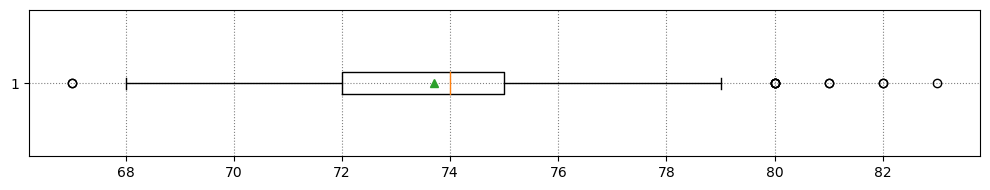

In [16]:
plt.figure(figsize=(10,2))
plt.boxplot(Data['Height(inches)'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

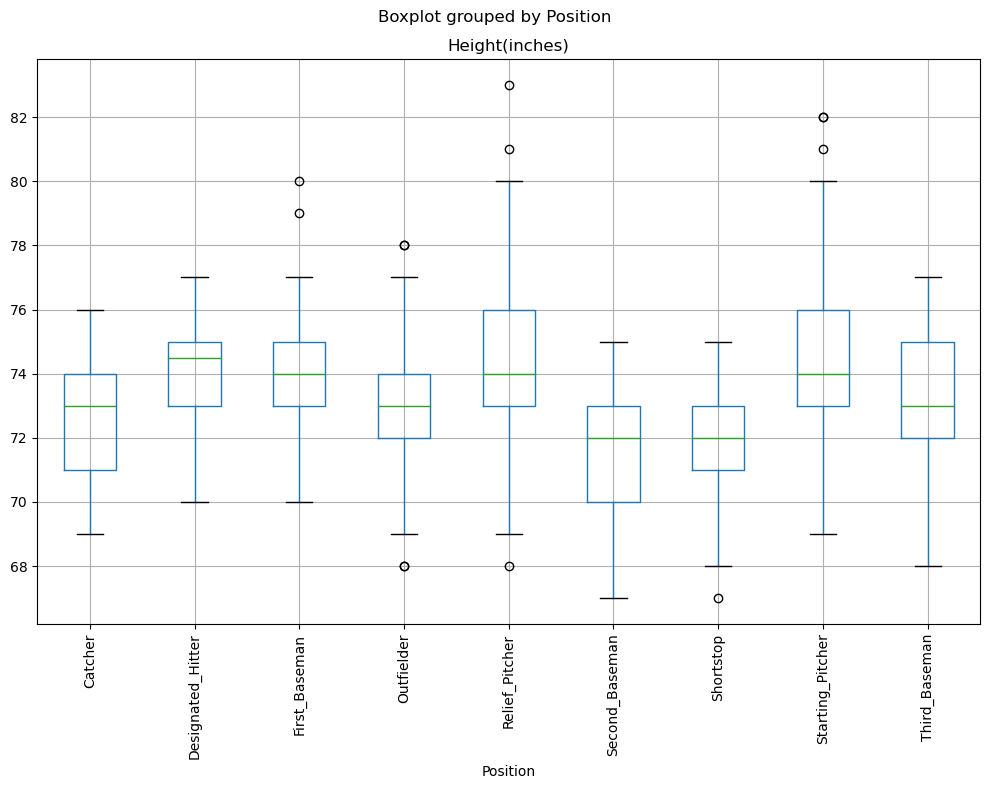

In [17]:
Data.boxplot(column='Height(inches)', by='Position', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

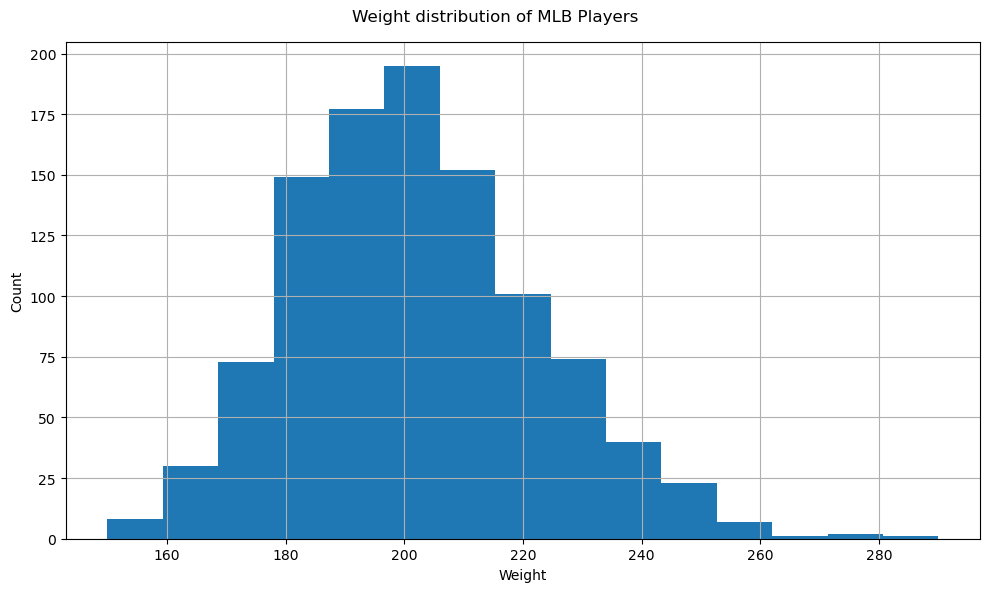

In [18]:
Data['Weight(pounds)'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [20]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(Data['Weight(pounds)'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 201.73 ± 0.94
p=0.90, mean = 201.73 ± 1.08
p=0.95, mean = 201.73 ± 1.28


In [21]:
Data.groupby('Position').agg({ 'Height(inches)' : 'mean', 'Weight(pounds)' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height(inches),Weight(pounds),Count
Position,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


In [22]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(Data.loc[Data['Position']=='First_Baseman',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(Data.loc[Data['Position']=='Second_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


In [24]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(Data.loc[Data['Position']=='First_Baseman',['Height(inches)']], Data.loc[Data['Position']=='Second_Baseman',['Height(inches)']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738959e-12


## The two values returned by the `ttest_ind` function are:
## * p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller.
## * t-value is the intermediate value of normalized mean difference that is used in the t-test, and it is compared against a threshold value for a given confidence value.

In [25]:
np.corrcoef(Data['Height(inches)'],Data['Weight(pounds)'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

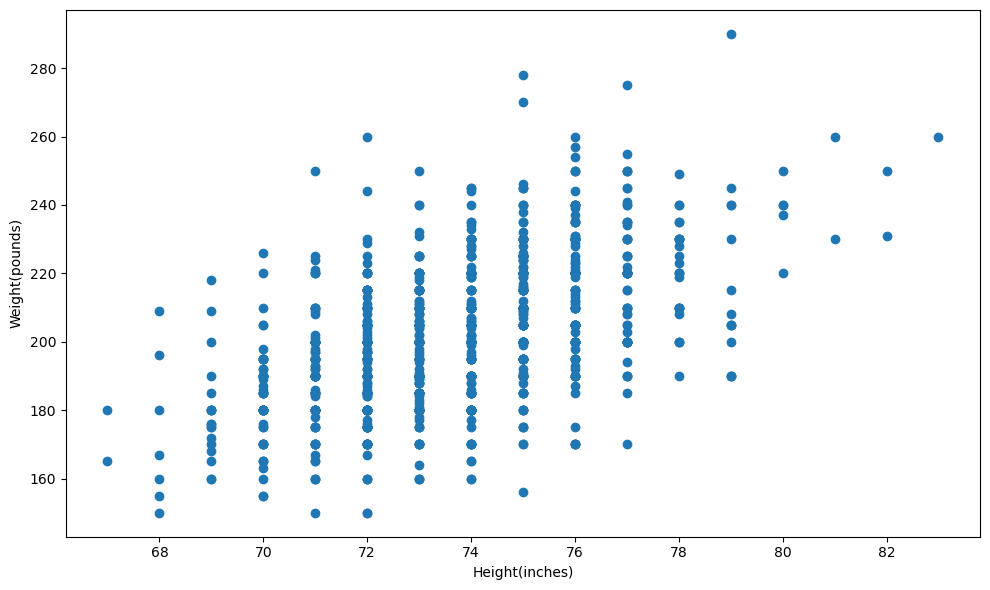

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(Data['Height(inches)'],Data['Weight(pounds)'])
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.tight_layout()
plt.show()

Challege,  First basemen are taller than third basemen

In [28]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(Data.loc[Data['Position']=='First_Baseman',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(Data.loc[Data['Position']=='Third_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 3rd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 3rd basemen height: 72.58..73.51
Conf=0.90, 1st basemen height: 73.56..74.44, 3rd basemen height: 72.51..73.58
Conf=0.95, 1st basemen height: 73.47..74.53, 3rd basemen height: 72.40..73.68


# Challege,  Shortstops are taller than second basemen

In [29]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(Data.loc[Data['Position']=='Shortstop',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(Data.loc[Data['Position']=='Second_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, Shortstop height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, Shortstop height: 71.54..72.27, 2nd basemen height: 71.04..71.69
Conf=0.90, Shortstop height: 71.49..72.32, 2nd basemen height: 70.99..71.73
Conf=0.95, Shortstop height: 71.40..72.40, 2nd basemen height: 70.92..71.81


# Challege,  First basemen are older than second basemen

In [30]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(Data.loc[Data['Position']=='First_Baseman',['Age']],p)
    m2, h2 = mean_confidence_interval(Data.loc[Data['Position']=='Second_Baseman',['Age']],p)
    print(f'Conf={p:.2f}, 1st basemen age: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen age: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen age: 28.56..30.39, 2nd basemen age: 28.18..29.87
Conf=0.90, 1st basemen age: 28.42..30.53, 2nd basemen age: 28.06..29.99
Conf=0.95, 1st basemen age: 28.22..30.73, 2nd basemen age: 27.87..30.18
